## 模型

### SIR
The SIR model of epidemiology partitions the population into three compartments: susceptibles, S, who can catch the disease; infectives, I, who have already caught the disease and infect susceptibles; and removed individuals, R. Since the disease is assumed not to be fatal, the sum
remains constant. The rate at which the susceptibles get infected is
where the parameter is the probability of infection on contact. The infected individuals remove from the disease at a rate

. Then, the ordinary differential equations of the SIR model are

This example integrates the above equations to obtain what is called the epidemic curve: a plot of the number of susceptibles and infectives as a function of time.

Below we use the class Model to simulate SIR model with three age-groups

### SEIR 
SEIR, extends the number of classes by the vaccinated version of classes and sets up all the transitions. There are additional infection terms, the linear terms are the same in the vaccinated compartments (though they might be changed later, to account for a reduction in severity), and finite resource terms move individuals from the unvaccinated to the vaccinated classes.

This avoids typing the whole model specification by hand, and should also work for our more detailed, calibrated models.

The vaccinated version of class X is labeled XV, The extension to different types/doses of vaccinations should be straightforward (XV1, XV2, et.c).

In [1]:


# M=3, SIR with three age-groups

import numpy as np
import pyross
import copy

import matplotlib.pyplot as plt

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

/tmp/ipykernel_14593/1308061497.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df28['date'] =  pd.to_datetime(df28['date'], format="%Y/%m/%d")


Text(0, 0.5, 'total_cases')

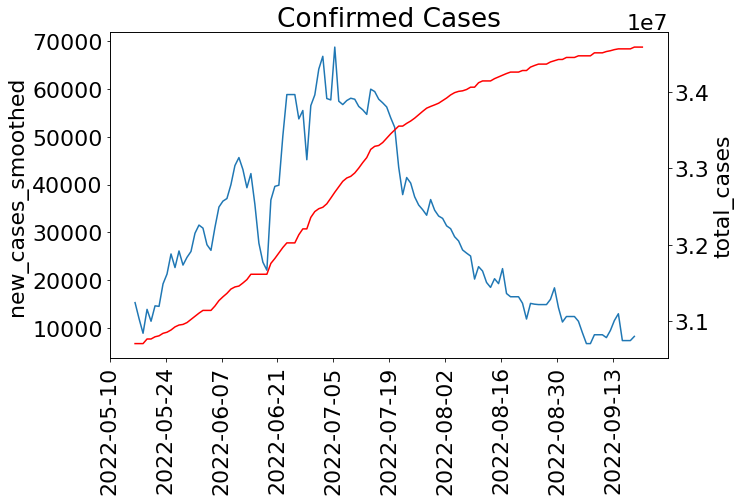

In [501]:
import pandas as pd
df=pd.read_csv("/media/moo/数据/qp/covid19/data/owid-covid-data.csv")
cols=["iso_code",
      "continent",
      "location",
      "date",
      "total_cases",
      "new_cases",
      "new_cases_smoothed",
      "total_deaths",
      "new_deaths",
      "new_deaths_smoothed",
      "reproduction_rate",
      "icu_patients",
      "hosp_patients",
      "total_vaccinations",
      "new_vaccinations",
      "new_vaccinations_smoothed",
      "total_vaccinations_per_hundred",
      "people_vaccinated_per_hundred",
      "people_fully_vaccinated_per_hundred",
      "stringency_index",
      "population",
      "population_density",
      "median_age",
      "aged_65_older",
      "aged_70_older",
      "cardiovasc_death_rate",
      "diabetes_prevalence",
      "hospital_beds_per_thousand"
]

df28=df[cols]
df28['date'] =  pd.to_datetime(df28['date'], format="%Y/%m/%d")

df_bra=df28[df28.location=="Brazil"]
df_deu=df28[df28.location=="Germany"]
df_zaf=df28[df28.location=="South Africa"]


start_stamp = pd.Timestamp('2022-05-16')
df_bra=df_bra[df_bra.date>start_stamp]

'''
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize = (10, 10),sharex=True)
new_cases_smoothed=df_bra["new_cases_smoothed"]
total_cases=df_bra["total_cases"]
x1=df_bra.date

ax1.plot(x1,new_cases_smoothed)
# plt.xticks(rotation=90)
ax2.plot(x1,total_cases-total_cases.values[0])
plt.xticks(rotation=90)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 14))
ax2.xaxis.set_ticks(np.arange(start, end, 14))
'''

fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(111)
ax1.plot(x1,new_cases_smoothed)
ax1.set_ylabel('new_cases_smoothed')
ax1.set_title("Confirmed Cases")
plt.xticks(rotation=90)
ax2 = ax1.twinx()  
ax2.plot(x1, total_cases, 'r')

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 14))
ax2.set_ylabel('total_cases')
# ax2.set_xlabel('')



Text(0, 0.5, 'vaccination percentage')

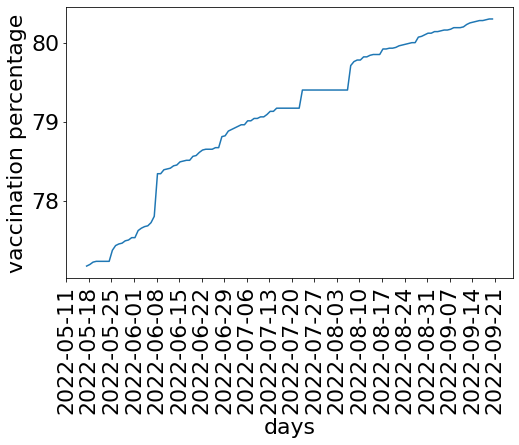

In [689]:
start_stamp = pd.Timestamp('2022-05-09')
df_bra[df_bra.date>start_stamp]


fig, ax = plt.subplots(figsize = (8, 5))
# y1=df_bra["new_cases_smoothed"]
df_bra['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
df_bra['stringency_index'].fillna(method='ffill', inplace=True)
y2=df_bra[df_bra.date>start_stamp]["people_fully_vaccinated_per_hundred"]
stringency=df_bra[df_bra.date>start_stamp]["stringency_index"]

x1=df_bra[df_bra.date>start_stamp]["date"]
# ax.plot(x1,y1)
ax.plot(x1,y2)
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 7))
plt.xlabel('days')
plt.ylabel('vaccination percentage')
# vacc_rate=df_bra[df_bra.date>start_stamp]["people_fully_vaccinated_per_hundred"]
# vacc_rate.plot()

In [690]:
# df_bra['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
# df_bra['people_fully_vaccinated_per_hundred'].plot()

# df_bra["reproduction_rate"].plot()
# start_stamp
len(df_bra.date)
# total_cases
# pd.Timestamp('2022-05-16')
len(y2.values)


128

#### Stringency Index

The stringency index is a composite measure based on nine response indicators including:
    school closures, 
    workplace closures, and
    travel bans, rescaled to avalue from 0 to 100 (100 = strictest).

Text(0, 0.5, 'stringency index')

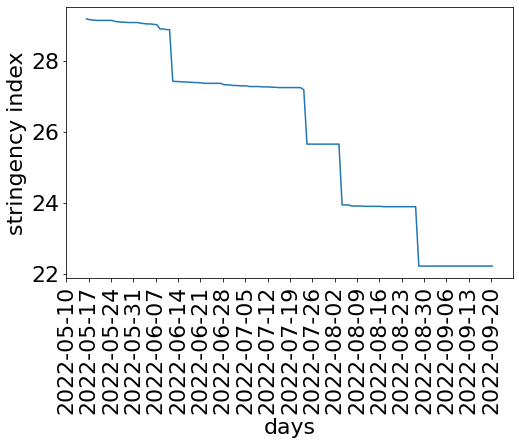

In [691]:
# stringency.plot()

fig, ax = plt.subplots(figsize = (8, 5))
# y1=df_bra["new_cases_smoothed"]
# df_bra['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace=True)
df_bra['stringency_index'].fillna(method='ffill', inplace=True)
# y2=df_bra[df_bra.date>start_stamp]["people_fully_vaccinated_per_hundred"]
stringency=df_bra[df_bra.date>start_stamp]["stringency_index"]

x1=df_bra[df_bra.date>start_stamp]["date"]
# ax.plot(x1,y1)
ax.plot(x1,stringency)
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 7))
plt.xlabel('days')
plt.ylabel('stringency index')

In [692]:


model_spec = {
    "classes" : ["S", "E", "I", "R"],

    "S" : {
        "infection" : [ ["I", "S", "-beta"] ]
    },

    "E" : {
        "linear"    : [ ["E", "-gammaE"] ],
        "infection" : [ ["I", "S", "beta"] ]
    },
    
    "I" : {
        "linear"    : [ ["E", "gammaE"],
                        ["I", "-gammaI"]]  
    },
    
    "R" : {
        "linear"    : [ ["I", "gammaI"] ],     
    }
}


# model_spec = {
#     "classes" : ["S", "E", "A", "I", "R"],

#     "S" : {
#         "linear"    : [],
#         "infection" : [ ["I", "-betaI"], ["A", "-betaA"] ]
#     },

#     "E" : {
#         "linear"    : [ ["E", "-gammaE"] ],
#         "infection" : [ ["I", "betaI"], ["A", "betaA"] ]
#     },

#     "A" : {
#         "linear"    : [ ["E", "gammaE"], ["A", "-gammaA"] ],
#         "infection" : []
#     },

#     "I" : {
#         "linear"    : [ ["A", "gammaA"], ["I", "-gammaI"] ],
#         "infection" : []
#     },

#     "R" : {
#         "linear"    : [ ["I", "gammaI"] ],
#         "infection" : []
#     }
# }



In [693]:
model_spec_vaccinations = copy.deepcopy(model_spec)

for cl in model_spec["classes"]:
    clV = cl+'V'
    model_spec_vaccinations["classes"].append(clV)
    
    model_spec_vaccinations[clV] = {}
    if "infection" in model_spec[cl]:
        model_spec_vaccinations[clV]["infection"] = []
        for term in model_spec[cl]["infection"]:
            
            termI = term.copy() # vaccinated infecting unvaccinated
            termI[0] += 'V'
            termI[2] += "*thetaI"
            model_spec_vaccinations[cl]["infection"].append(termI)
            
            termS = term.copy() # unvaccinated infecting vaccinated
            termS[1] += 'V'
            termS[2] += "*thetaS"
            model_spec_vaccinations[clV]["infection"].append(termS)
            
            termSI = term.copy() # vaccinated infecting vaccinated
            termSI[0] += 'V'
            termSI[1] += 'V'
            termSI[2] += "*thetaS*thetaI"
            model_spec_vaccinations[clV]["infection"].append(termSI)
            
    if "linear" in model_spec[cl]:
        model_spec_vaccinations[clV]["linear"] = []
        for term in model_spec[cl]["linear"]:
            termV = term.copy()
            termV[0] += 'V'
            model_spec_vaccinations[clV]["linear"].append(termV)
    
    if "finite-resource" in model_spec[cl]:
        model_spec_vaccinations[clV]["finite-resource"] = []
        for term in model_spec[cl]["finite-resource"]:
            termV = term.copy()
            termV[0] += 'V'
            model_spec_vaccinations[clV]["finite-resource"].append(termV)
    else:
        model_spec_vaccinations[cl]["finite-resource"] = []
        model_spec_vaccinations[clV]["finite-resource"] = []
    term = [cl, "vaccination_rate", "vaccination_priority", "one"]   # one: probability that the vaccination is successful. Set to 1, because we already 
                                                                     # account for the imperfectness of vaccinations through the theta parameters
    model_spec_vaccinations[clV]["finite-resource"].append(term.copy())
    term[1] = "-"+term[1]
    model_spec_vaccinations[cl]["finite-resource"].append(term)
    
model_spec_vaccinations

{'classes': ['S', 'E', 'I', 'R', 'SV', 'EV', 'IV', 'RV'],
 'S': {'infection': [['I', 'S', '-beta'], ['IV', 'S', '-beta*thetaI']],
  'finite-resource': [['S',
    '-vaccination_rate',
    'vaccination_priority',
    'one']]},
 'E': {'linear': [['E', '-gammaE']],
  'infection': [['I', 'S', 'beta'], ['IV', 'S', 'beta*thetaI']],
  'finite-resource': [['E',
    '-vaccination_rate',
    'vaccination_priority',
    'one']]},
 'I': {'linear': [['E', 'gammaE'], ['I', '-gammaI']],
  'finite-resource': [['I',
    '-vaccination_rate',
    'vaccination_priority',
    'one']]},
 'R': {'linear': [['I', 'gammaI']],
  'finite-resource': [['R',
    '-vaccination_rate',
    'vaccination_priority',
    'one']]},
 'SV': {'infection': [['I', 'SV', '-beta*thetaS'],
   ['IV', 'SV', '-beta*thetaS*thetaI']],
  'finite-resource': [['S',
    'vaccination_rate',
    'vaccination_priority',
    'one']]},
 'EV': {'infection': [['I', 'SV', 'beta*thetaS'],
   ['IV', 'SV', 'beta*thetaS*thetaI']],
  'linear': [['EV', '-

In [694]:
parameters = {
    'beta' : 0.0795,    #𝛽 每天每个感染者通过接触感染的人数，如 𝛽=1/2 (即感染者每2天感染1个人)
    'gammaE' : 1/5,    #𝜎 =传染率，即一个感染者其病毒传染的概率
    'gammaI' : 1/10,   #𝛾 = 𝑅/I : 感染人群被治愈的比重。 𝛾 = 1/3 ， 即平均每3天有一个人被治愈
    'thetaS' : 0.6,  
    'thetaI' : 0.6,
}

In [695]:
# def vaccination_rate0(t):
#     rate=300*np.array([0.5*np.tanh((t-180)/10)-0.5*np.tanh((t-270)/10),
#                        0.5*np.tanh((t-120)/10)-0.5*np.tanh((t-180)/10),
#                        0.5*np.tanh((t-120)/20)-0.5*np.tanh((t-120)/10)  ])
#     rate*=(rate>1)
#     return rate

def vaccination_rate(t):
    rate = y2.values[int(t+1)]
    if rate!=np.nan:
        return np.array([rate,rate,rate])
    else:
        print("NaN")
    

def parameter_mapping(input_parameters, t):
    output_parameters = {
        'beta' : input_parameters['beta'],
        'gammaE' : input_parameters['gammaE'],
        'gammaI' : input_parameters['gammaI'],
        'beta*thetaS' : input_parameters['beta']*input_parameters['thetaS'],
        'beta*thetaI' : input_parameters['beta']*input_parameters['thetaI'],
        'beta*thetaS*thetaI' : input_parameters['beta']*input_parameters['thetaS']*input_parameters['thetaI'],
        'one' : 1,
        'vaccination_priority' : 1,
        'vaccination_rate' : vaccination_rate(t)     
    }
        
    return output_parameters



In [696]:
t=np.linspace(1,126,300)
# v=[vaccination_rate(tt) for tt in t]
# plt.plot(t,v)
# plt.xlabel('days')
# plt.ylabel('vaccination rate (by age)')
# plt.show()
vaccination_rate(1)

# #t=[0,126]
# t=np.linspace(90,180,270)
len(t)
# t
# y1.max(),y1.min()
# Ni-I0 - E0 - R0
# stringency.values[100]
# stringency.values[11]/100


300

In [697]:
M = 3                
# Ni = [2653381, 13965964,940716]#14500000*np.ones(M)
# N = np.sum(Ni) 


N = df_bra.population.values[0]
# 设置年龄结构
age_structure=np.array([0.204506127,0.6961065212,1-0.204506127-0.6961065212])
fi = age_structure
Ni = N*fi

# initial conditions as a dictionary 
E0 = [5000, 5000, 5000]
# S0 = [n-5000 for n in Ni]
I0 = [5000, 5000, 5000]
R0 = [0, 0, 0]
S0  = Ni*(1-0.7717) - I0 - E0 - R0

x0 = {
    'S' : S0,
    'E' : E0,
    'I' : I0, 
    'R' : R0 
}

CM = np.array([
    [10,   8,     1],  # youngest cohort spreading most
    [8,   10,     5],
    [1,    5,    10]
], dtype=float)

# the contact matrix is time-dependent
def contactMatrix(t):
#     if t<14:
#         xx = CM
#     elif 14<=t<60:
#         xx = 0.5*CM
#     elif 60<=t<180:
#         xx = 0.9*CM
#     elif 180<=t<300:
#         xx = 0.5*CM
#     else:
#         xx = CM
#     return xx
    return CM*(stringency.values[int(t+1)])/100

for cl in model_spec["classes"]:
    x0[cl+'V'] = np.zeros(M)


# duration of simulation and data file
Tf = 126;  Nf=Tf+1; 

model = pyross.deterministic.Model(model_spec_vaccinations, 
                                   parameters, 
                                   M, 
                                   Ni, 
                                   time_dep_param_mapping=parameter_mapping)
# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

data

{'X': array([[9.99662319e+06, 3.40509631e+07, 4.85309038e+06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.99614779e+06, 3.40488881e+07, 4.85270449e+06, ...,
         4.02695799e-03, 1.19291686e-03, 8.28229639e-03],
        [9.99564253e+06, 3.40466678e+07, 4.85229769e+06, ...,
         1.66420017e-02, 5.03849557e-03, 3.41852136e-02],
        ...,
        [9.91919738e+06, 3.37586394e+07, 4.81479995e+06, ...,
         6.03886516e+01, 6.56911121e+01, 6.60542945e+01],
        [9.91880969e+06, 3.37573492e+07, 4.81461747e+06, ...,
         6.12181353e+01, 6.66193744e+01, 6.68341659e+01],
        [9.91842635e+06, 3.37560762e+07, 4.81443647e+06, ...,
         6.20491400e+01, 6.75493391e+01, 6.76150053e+01]]),
 't': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  

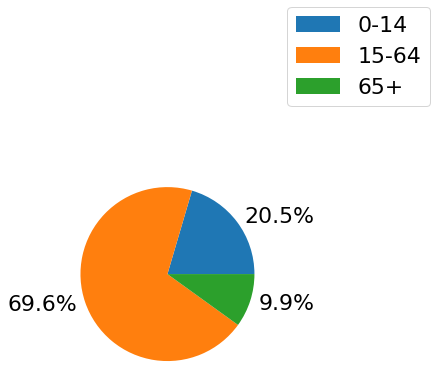

In [650]:
plt.pie(age_structure, labels=['20.5%','69.6%','9.9%'])
# age_structure
plt.legend(['0-14','15-64','65+'],loc="center left",bbox_to_anchor=(1, 1, 0.5, 1))

127


Text(0, 0.5, 'total_cases')

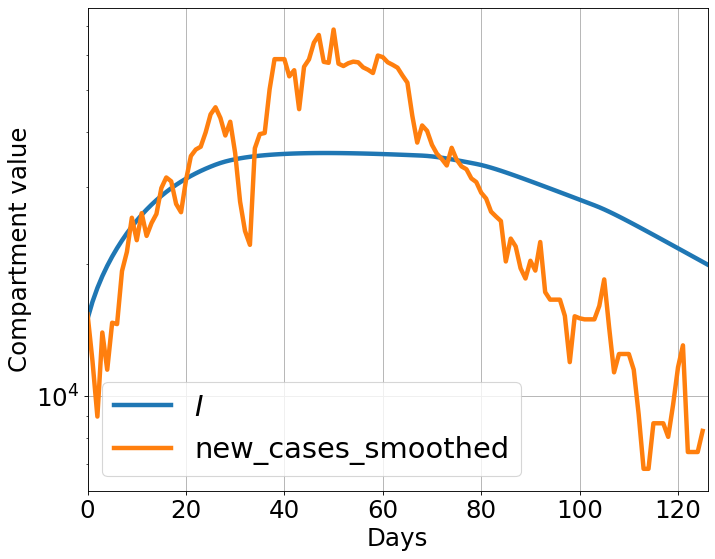

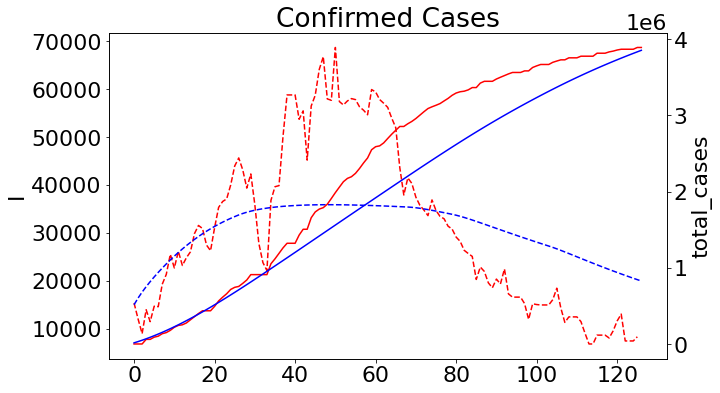

In [651]:

# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
E = np.sum(model.model_class_data('E', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
SV = np.sum(model.model_class_data('SV', data), axis=1)
EV = np.sum(model.model_class_data('EV', data), axis=1)
IV = np.sum(model.model_class_data('IV', data), axis=1)
RV = np.sum(model.model_class_data('RV', data), axis=1)
V=SV+EV+IV+RV
t = data['t']
print(len(t))

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


# plt.semilogy(t, S+SV, '-',  label='$S$', lw=4)
# plt.semilogy(t, E+EV, '-',  label='$E$', lw=4)
plt.semilogy(t, I+IV, '-', label='$I$', lw=4)
plt.semilogy(t, new_cases_smoothed[:127], '-', label='new_cases_smoothed', lw=4)

# plt.semilogy(t, R+RV, '-',  label='$R$', lw=4)
# plt.semilogy(t, V, '-',  label='$V$', lw=4)

# plt.semilogy(t, I, '-', label='$In$', lw=4)
# plt.semilogy(t, IV, '-', label='$Iv$', lw=4)


plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');




fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(111)
ax1.plot(t,new_cases_smoothed[:127],'r',linestyle='dashed')
ax1.plot(t,I+IV,'b',linestyle='dashed')

ax1.set_ylabel('I')
ax1.set_title("Confirmed Cases")
# plt.xticks(rotation=90)
ax2 = ax1.twinx()  
ax2.plot(t, total_cases[:127]-total_cases.values[0], 'r')

from functools import reduce
I_acc=reduce(lambda x, y: x + [x[-1] + y], I+IV, [0])[1:]
ax2.plot(t,I_acc,'b')


# start, end = ax1.get_xlim()
# ax1.xaxis.set_ticks(np.arange(start, end, 14))
ax2.set_ylabel('total_cases')

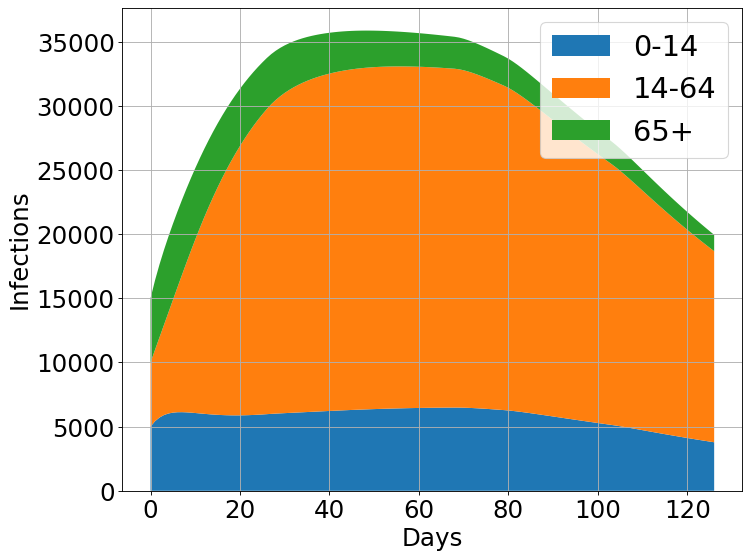

In [652]:
# age structure
Ii = model.model_class_data('I', data)
IVi = model.model_class_data('IV', data)


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})
plt.stackplot(t,np.transpose(Ii+IVi),labels=('0-14','14-64','65+'))
plt.legend(fontsize=26); plt.grid()
plt.ylabel('Infections')
plt.xlabel('Days');

In [653]:


# unvaccinated
np.round(np.sum(Ii,axis=0)*parameters['gammaI'])



array([ 73304., 274681.,  37233.])

In [654]:


# vaccinated
np.round(np.sum(IVi,axis=0)*parameters['gammaI'])



array([24., 28., 20.])

In [655]:
N

214326223.0

In [656]:
Ni

array([4.38310258e+07, 1.49193881e+08, 2.13013157e+07])

In [657]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pyross
import time 

In [716]:
'''
M = 2                # the population has two age groups
N = 1e6              # and this is the total population

# parameters for generating synthetic trajectory 
beta  = 0.02         # infection rate
gIa   = 1./7         # recovery rate of asymptomatic infectives
gIs   = 1./7         # recovery rate of asymptomatic infectives
alpha = 0.2          # fraction of asymptomatic infectives
fsa   = 1          # the self-isolation parameter

# set the age structure
fi = np.array([0.25, 0.75])  # fraction of population in age age group
Ni = N*fi

# set the contact structure
C = np.array([[18., 9.], 
              [3., 12.]]) 
# C_ij = number of people group from group i that an individual from group j meets per day 

# set up initial condition
Ia0 = np.array([10, 10])  # each age group has asymptomatic infectives
Is0 = np.array([2, 2])  # and also symptomatic infectives
R0  = np.array([0, 0])    # there are no recovered individuals initially
S0  = Ni - (Ia0 + Is0 + R0)

Tf = 100
Nf = Tf+1

def contactMatrix(t):
    return C

parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
true_parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}



# 使用模型生成 traj 并保存 
sto_model = pyross.stochastic.SIR(parameters, M, Ni)
data = sto_model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nf, method='tau-leaping')

'''
data_array = data['X']
np.save('SIR_sto_traj.npy', data_array)

# fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.rcParams.update({'font.size': 22})

# t=data['t']
# # plt.fill_between(t, 0, np.sum(data_array[:, :M], axis=1),  alpha=0.3)
# # plt.plot(t, np.sum(data_array[:, :M], axis=1), '-', label='S', lw=2)

# plt.fill_between(t, 0, np.sum(data_array[:, M:2*M], axis=1), alpha=0.3)
# plt.plot(t, np.sum(data_array[:, M:2*M], axis=1), '-', label='Ia', lw=2)

# plt.fill_between(t, 0, np.sum(data_array[:, 2*M:3*M], axis=1), alpha=0.3)
# plt.plot(t, np.sum(data_array[:, 2*M:3*M], axis=1), '-', label='Is', lw=2)

# plt.legend(fontsize=26)
# plt.grid() 
# plt.xlabel(r'time') 
# plt.autoscale(enable=True, axis='x', tight=True)

data


{'X': array([[9.99662319e+06, 3.40509631e+07, 4.85309038e+06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.99614779e+06, 3.40488881e+07, 4.85270449e+06, ...,
         4.02695799e-03, 1.19291686e-03, 8.28229639e-03],
        [9.99564253e+06, 3.40466678e+07, 4.85229769e+06, ...,
         1.66420017e-02, 5.03849557e-03, 3.41852136e-02],
        ...,
        [9.91919738e+06, 3.37586394e+07, 4.81479995e+06, ...,
         6.03886516e+01, 6.56911121e+01, 6.60542945e+01],
        [9.91880969e+06, 3.37573492e+07, 4.81461747e+06, ...,
         6.12181353e+01, 6.66193744e+01, 6.68341659e+01],
        [9.91842635e+06, 3.37560762e+07, 4.81443647e+06, ...,
         6.20491400e+01, 6.75493391e+01, 6.76150053e+01]]),
 't': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  

In [720]:

# load the data and rescale to intensive variables 
Tf_inference = 30 # truncate to only getting the first few datapoints 
Nf_inference = Tf_inference+1
x = (data_array[:Nf_inference]).astype('float')

# x = np.load('SIR_sto_traj.npy').astype('float')

# # x = new_cases_smoothed[:127].astype('float')
# x = (x)[:Nf_inference]

# # estimator = pyross.inference.SIR(parameters, M, Ni)
# # estimator = pyross.inference.Model(model_spec_vaccinations, parameters, M, Ni)

# # Compare the deterministic trajectory and the stochastic trajectory with the same 
# # initial conditions and parameters 
# x0=x[0]
# estimator.set_det_model(parameters)
# estimator.set_contact_matrix(contactMatrix)
# xm = estimator.integrate(x[0], 0, Tf_inference, Nf_inference)
# fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.rcParams.update({'font.size': 22})
# plt.plot(np.sum(xm[:, M:], axis=1), label='deterministic I')
# plt.plot(np.sum(x[:Nf_inference, M:], axis=1), label='stochastic I')
# plt.legend()
# plt.show()





# print(model_spec_vaccinations)



inference_parameters = {
         'beta': np.array([0.0795, 0.0795, 0.0795]),
         'gammaE': np.array([0.2, 0.2, 0.2]),
         'gammaI': np.array([0.1, 0.1, 0.1]),
         'beta*thetaS': np.array([0.0477, 0.0477, 0.0477]),
         'beta*thetaI': np.array([0.0477, 0.0477, 0.0477]),
         'beta*thetaS*thetaI': np.array([0.02862, 0.02862, 0.02862]),
         'one': np.array([1., 1., 1.]),
         'vaccination_priority': np.array([1., 1., 1.]),
         'vaccination_rate': np.array([77.17, 77.17, 77.17])
}
estimator = pyross.inference.Model(model_spec_vaccinations, inference_parameters, M, Ni)

# # load the data and rescale to intensive variables 
# Tf_inference = 30 # truncate to only getting the first few datapoints 
# Nf_inference = Tf_inference+1

# x = new_cases_smoothed[:Nf_inference].astype('float')

# # check integrate 
logp = estimator.obtain_minus_log_p(inference_parameters, x, Tf_inference, contactMatrix)
print(logp)


908.3716779178611


In [721]:


# compute -log_p for the original (correct) parameters 
start_time = time.time() 
parameters = inference_parameters

# use faster ODE methods to speed up inference 
estimator.set_lyapunov_method('euler')
logp = estimator.obtain_minus_log_p(parameters, x, Tf_inference, contactMatrix, tangent=False)
end_time = time.time()
print(logp) 
print(end_time - start_time)



931.5652232653656
0.029323816299438477


In [722]:


# compare to tangent space 
start_time = time.time() 
parameters = inference_parameters
logp = estimator.obtain_minus_log_p(parameters, x, Tf_inference, contactMatrix, tangent=True)
end_time = time.time()
print(logp) 
print(end_time - start_time)



954.5798305593828
0.007602691650390625


In [723]:


# # Define the prior (log normal prior around guess of parameter with defined std. deviation)
# alpha_g = 0.25
# beta_g = 0.04
# gIa_g = 0.1
# gIs_g = 0.1


# # compute -log_p for the initial guess 
# parameters = inference_parameters
# logp = estimator.obtain_minus_log_p(parameters, x, Tf_inference, contactMatrix)
# print(logp) 



931.5652232653656


In [725]:
'''
         'beta': np.array([0.0795, 0.0795, 0.0795]),
         'gammaE': np.array([0.2, 0.2, 0.2]),
         'gammaI': np.array([0.1, 0.1, 0.1]),
         'beta*thetaS': np.array([0.0477, 0.0477, 0.0477]),
         'beta*thetaI': np.array([0.0477, 0.0477, 0.0477]),
         'beta*thetaS*thetaI': np.array([0.02862, 0.02862, 0.02862]),
         'one': np.array([1., 1., 1.]),
         'vaccination_priority': np.array([1., 1., 1.]),
         'vaccination_rate': np.array([77.17, 77.17, 77.17])
'''

# Set up priors 
eps = 1e-4
priors = {
    'beta':{
        'mean': 0.0795, 
        'std': 0.2, 
        'bounds': [eps, 0.8], 
        'prior_fun': 'truncnorm'
    }, 
    'gammaE':{
        'mean': 0.2, 
        'std': 0.1, 
        'bounds': [eps, 0.2], 
        'prior_fun': 'lognorm'
    }, 
    'gammaI':{
        'mean': 0.1, 
        'std': 0.2, 
        'bounds': [eps, 0.6]
    }
}

# Stopping criterion for minimisation (realtive change in function value)
ftol = 1e-6  
start_time = time.time() 
res = estimator.infer_parameters(x, Tf_inference, contactMatrix, priors, tangent=False, 
                                    global_max_iter=20, local_max_iter=400,
                                    cma_population=32, global_atol=10,
                                    ftol=ftol, verbose=True)
end_time = time.time()

print(res['map_dict']) # best guess 
print(end_time - start_time)



Starting global minimisation ...
(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 3 (seed=161106858, Fri Sep 23 22:45:11 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     32 2.331766121302369e+04 1.0e+00 8.86e-01  6e-02  2e-01 0:01.5
    2     64 2.641110738158215e+03 1.3e+00 7.54e-01  5e-02  1e-01 0:02.7
    3     96 1.708442949766261e+03 1.4e+00 6.71e-01  4e-02  9e-02 0:03.8
    6    192 2.097045196085140e+03 2.5e+00 6.58e-01  4e-02  6e-02 0:07.2
   10    320 1.214952232041536e+03 9.7e+00 3.95e-01  8e-03  3e-02 0:11.6
   15    480 8.513593492889757e+02 2.6e+01 1.99e-01  1e-03  1e-02 0:17.3
Global optimisation: Maximum number of iterations reached.
Optimal value (global minimisation):  743.8419424051965
Starting local minimisation...
Optimal value (local minimisation):  717.9336263012722
{'beta': 0.07999984741709554, 'gammaE': 0.1997210783638968, 'gammaI': 0.10123728173062965, 'beta*thetaS': array([0.0477, 0.0477, 0.0477]), 'beta*thetaI': array([

In [726]:


# compute log_p for best estimate 
start_time = time.time() 
logp = estimator.obtain_minus_log_p(res['map_dict'], x, Tf_inference, contactMatrix)
end_time = time.time()
print(logp) 
print(end_time - start_time)



721.9317393532036
0.02881455421447754


In [729]:


print("True parameters:")
print(true_parameters)

print("\nInferred parameters:")
print(res['map_dict'])

print(res['flat_map'])

x

True parameters:
{'alpha': 0.2, 'beta': 0.02, 'gIa': 0.14285714285714285, 'gIs': 0.14285714285714285, 'fsa': 1}

Inferred parameters:
{'beta': 0.07999984741709554, 'gammaE': 0.1997210783638968, 'gammaI': 0.10123728173062965, 'beta*thetaS': array([0.0477, 0.0477, 0.0477]), 'beta*thetaI': array([0.0477, 0.0477, 0.0477]), 'beta*thetaS*thetaI': array([0.02862, 0.02862, 0.02862]), 'one': array([1., 1., 1.]), 'vaccination_priority': array([1., 1., 1.]), 'vaccination_rate': array([77.17, 77.17, 77.17])}
[0.07999985 0.19972108 0.10123728]


array([[9.99662319e+06, 3.40509631e+07, 4.85309038e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99614779e+06, 3.40488881e+07, 4.85270449e+06, ...,
        4.02695799e-03, 1.19291686e-03, 8.28229639e-03],
       [9.99564253e+06, 3.40466678e+07, 4.85229769e+06, ...,
        1.66420017e-02, 5.03849557e-03, 3.41852136e-02],
       ...,
       [9.91919738e+06, 3.37586394e+07, 4.81479995e+06, ...,
        6.03886516e+01, 6.56911121e+01, 6.60542945e+01],
       [9.91880969e+06, 3.37573492e+07, 4.81461747e+06, ...,
        6.12181353e+01, 6.66193744e+01, 6.68341659e+01],
       [9.91842635e+06, 3.37560762e+07, 4.81443647e+06, ...,
        6.20491400e+01, 6.75493391e+01, 6.76150053e+01]])

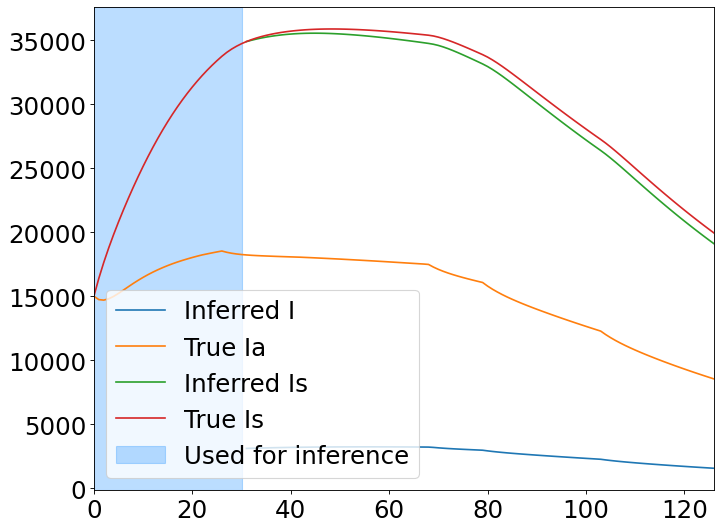

In [730]:


x = np.load('SIR_sto_traj.npy').astype('float')
Nf = x.shape[0]
Tf = Nf-1

# set the deterministic method to be solve_ivp for accurate integration over long time scale 
estimator.set_det_model(res['map_dict'])
estimator.set_params(res['map_dict'])

x_det = estimator.integrate(x[Nf_inference], Nf_inference, Tf, Nf-Nf_inference)
t_inf = np.linspace(Nf_inference, Tf, Nf-Nf_inference)
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})
# plt.plot(np.sum(x_det[:, :M], axis=1), label='Inferred S')
# plt.plot(np.sum(x[:, :M], axis=1), label='True S')
plt.plot(t_inf, np.sum(x_det[:, M:2*M], axis=1), label='Inferred Ia')
plt.plot(np.sum(x[:, M:2*M], axis=1), label='True Ia')
plt.plot(t_inf, np.sum(x_det[:, 2*M:3*M], axis=1), label='Inferred Is')
plt.plot(np.sum(x[:, 2*M:3*M], axis=1), label='True Is')
plt.xlim([0, Tf])
plt.axvspan(0, Tf_inference, 
           label='Used for inference',
           alpha=0.3, color='dodgerblue')
plt.legend()
plt.show() 



In [731]:


eps = 1e-3
x = np.load('SIR_sto_traj.npy').astype('float')[:Nf_inference]
hess = estimator.hessian(x, Tf_inference, res, contactMatrix=contactMatrix, eps=eps, tangent=False,
                                 fd_method="central")



epsilon used for differentiation:  0.001


In [732]:


cov = np.linalg.inv(hess)
print(cov)
v, w = np.linalg.eig(cov)
print(v)



[[ 8.08159320e-09 -1.22257129e-09  1.09397713e-09]
 [-1.22257129e-09  7.37577694e-09  3.48494476e-11]
 [ 1.09397713e-09  3.48494476e-11  8.42059293e-09]]
[6.21459523e-09 9.66460223e-09 7.99876561e-09]


In [736]:


parameters = res['map_dict'].copy() 
parameters['fsa'] = fsa
parameters['cov'] = cov 

# Initialise pyross forecast module

model_forecast = pyross.forecast.SIR(parameters, M, Ni)
# model_forecast = pyross.forecast.Model(model_spec_vaccinations, inference_parameters, M, Ni)


# Initial condition for forecast is last configuration from inference-trajectory
S0_forecast = x[Tf_inference,:M]
Ia0_forecast = x[Tf_inference,M:2*M]
Is0_forecast = x[Tf_inference,2*M:]
print(Ia0_forecast, Is0_forecast)

# Number of simulations over which we average, use 500
Ns = 500

Tf_forecast = Tf - Tf_inference
Nf_forecast = Tf_forecast+1


result_forecast = model_forecast.simulate(S0_forecast, Ia0_forecast, Is0_forecast, 
                                          contactMatrix, Tf_forecast, Nf_forecast,
                                          verbose=True, method='deterministic',
                                          Ns=Ns) 

trajectories_forecast = result_forecast['X']
t_forecast = result_forecast['t'] + Tf_inference



TypeError: must be real number, not NoneType

In [735]:
fontsize=25
#

ylabel=r'Fraction of infectives'
#

# Plot total number of symptomatic infectives
cur_trajectories_forecast = trajectories_forecast[:,4] + trajectories_forecast[:,5]
cur_mean_forecast = np.mean( cur_trajectories_forecast, axis=0)
percentile = 10
percentiles_lower = np.percentile(cur_trajectories_forecast,percentile,axis=0)
percentiles_upper = np.percentile(cur_trajectories_forecast,100-percentile,axis=0)
percentiles_median = np.percentile(cur_trajectories_forecast,50,axis=0)

cur_trajectory_underlying = data_array[:,4] + data_array[:,5]

#
# Plot trajectories
#
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.axvspan(0, Tf_inference, 
           label='Range used for inference',
           alpha=0.3, color='dodgerblue')
ax.set_title(r'Forecast with inferred parameters',
             y=1.05,
            fontsize=fontsize)
# for i,e in enumerate(cur_trajectories_forecast):
#     ax.plot(t_forecast,e,
#             alpha=0.15,
#            )

ax.fill_between(t_forecast, percentiles_lower, percentiles_upper, color='darkorange', alpha=0.2)
ax.plot(cur_trajectory_underlying,
        lw=3,
        color='limegreen',
       label='Trajectory used for inference')

ax.plot(t_forecast,percentiles_median,
                alpha=1,ls='--',
        color='orange',label='Median',
       lw=3)
plt.legend()
plt.xlim([0, Tf])
plt.show()

NameError: name 'trajectories_forecast' is not defined